# MOVIE RATING PREDICTION WITH PYTHON

Build a model that predicts the rating of a movie based on
features like genre, director, and actors. You can use regression
techniques to tackle this problem.

The goal is to analyze historical movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.

Movie Rating Prediction project enables you to explore data
analysis, preprocessing, feature engineering, and machine
learning modeling techniques. It provides insights into the factors
that influence movie ratings and allows you to build a model that
can estimate the ratings of movies accurately.


In [1]:
# Data Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Model
from sklearn.ensemble import RandomForestRegressor

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
from google.colab import files
uploaded = files.upload()


Saving IMDb Movies India.csv to IMDb Movies India.csv


In [9]:
df = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [10]:
# Check structure
df.info()

# Summary statistics
df.describe()

# Check missing values
df.isnull().sum()

# Check column names
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

Text(0.5, 1.0, 'Top 10 Directors')

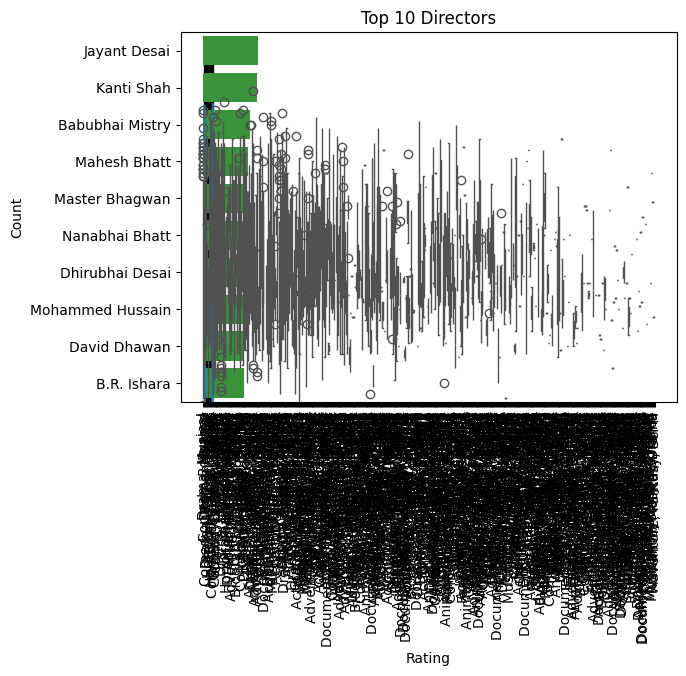

In [11]:
# Ratings distribution
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')

# Genre vs Rating
sns.boxplot(x='Genre', y='Rating', data=df)
plt.xticks(rotation=90)

# Top Directors by Count
top_directors = df['Director'].value_counts().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Directors')


In [13]:
print(df.columns.tolist())


['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']


In [14]:
# Drop rows where the target (Rating) is missing
df = df.dropna(subset=['Rating'])

# Fill missing values in relevant columns
df['Director'] = df['Director'].fillna('Unknown')
df['Genre'] = df['Genre'].fillna('Unknown')
df['Actor 1'] = df['Actor 1'].fillna('Unknown')
df['Actor 2'] = df['Actor 2'].fillna('Unknown')
df['Actor 3'] = df['Actor 3'].fillna('Unknown')

# Simplify Genre and Director if they have multiple entries (e.g., multiple genres or directors)
df['Genre'] = df['Genre'].apply(lambda x: x.split(',')[0])
df['Director'] = df['Director'].apply(lambda x: x.split(',')[0])

# Encode categorical features
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])
df['Director'] = le.fit_transform(df['Director'])
df['Actor 1'] = le.fit_transform(df['Actor 1'])
df['Actor 2'] = le.fit_transform(df['Actor 2'])
df['Actor 3'] = le.fit_transform(df['Actor 3'])


#  Feature Selection

In [15]:
# Define features (independent variables) and target (dependent variable)
X = df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Votes']]
y = df['Rating']


In [16]:
from sklearn.model_selection import train_test_split

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [22]:
df['Votes'] = df['Votes'].astype(str).str.replace(',', '')  # force to string, remove commas
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')   # convert back to float


In [23]:
df = df.dropna(subset=['Votes'])


In [25]:
X = df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Votes']]
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [26]:
# Predict on test data
y_pred = model.predict(X_test)


In [27]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluation metrics
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error (MSE): 1.5255862125289354
R² Score: 0.17941521660773618


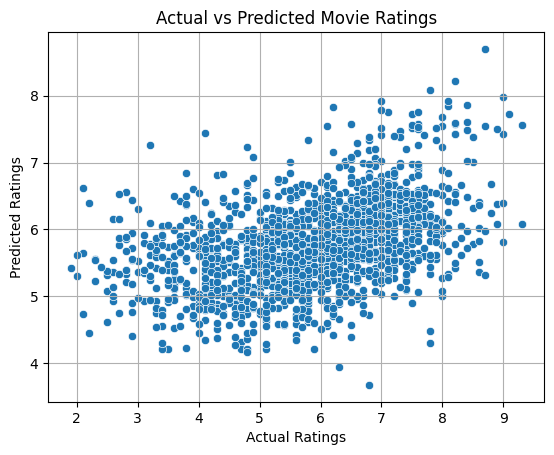

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Movie Ratings")
plt.grid(True)
plt.show()


In [29]:
# Save predictions for GitHub
output = X_test.copy()
output['Actual_Rating'] = y_test.values
output['Predicted_Rating'] = y_pred
output.to_csv('movie_rating_predictions.csv', index=False)


In [30]:
from google.colab import files
files.download('movie_rating_predictions.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>